In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

AxesSubplot(0.235366,0.125;0.554268x0.755)


,spatial_id,name,Total Households,Total Population,Median Household Income,geometry
0,5350001.00,"CT0001.00, Toronto, ON",249.0,600.0,79727.91,"POLYGON ((-79.30312052680827 43.6557792424362,..."
1,5350002.00,"CT0002.00, Toronto, ON",267.0,613.0,74505.79,POLYGON ((-79.34874705621597 43.63005940385361...
2,5350003.00,"CT0003.00, Toronto, ON",537.0,1557.0,88073.28,POLYGON ((-79.43442817686808 43.63362770070954...
3,5350004.00,"CT0004.00, Toronto, ON",3712.0,7177.0,27670.45,POLYGON ((-79.43602519603924 43.63716951121133...
4,5350005.00,"CT0005.00, Toronto, ON",3722.0,6969.0,33807.26,POLYGON ((-79.42457648823653 43.64104908625342...
5,5350006.00,"CT0006.00, Toronto, ON",0.0,0.0,0.00,POLYGON ((-79.43241604751883 43.63549278228854...
6,5350007.01,"CT0007.01, Toronto, ON",1892.0,3498.0,37613.16,"POLYGON ((-79.4301199122152 43.63619939920989,..."
7,5350007.02,"CT0007.02, Toronto, ON",2696.0,5112.0,29080.60,POLYGON ((-79.42572395914739 43.63410627057444...
8,5350008.00,"CT0008.00, Toronto, ON",NaN,NaN,NaN,None
9,5350008.01,"CT0008.01, Toronto, ON",5434.0,8228.0,90550.60,POLYGON ((-79.41083556987299 43.63923407801579...


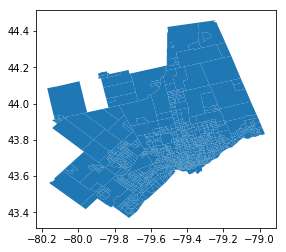

In [23]:
#import shapefile from Spatial Analytics
shapefile_SA = gpd.read_file("SA_shapefile.shp")
#Column labels taken from documentation provided with shapefile.
shapefile_SA.rename(columns={'VALUE0':'Total Households'}, inplace=True)
shapefile_SA.rename(columns={'VALUE1':'Total Population'}, inplace=True)
shapefile_SA.rename(columns={'VALUE2':'Median Household Income'}, inplace=True)
print(shapefile_SA.plot())
shapefile_SA

In [24]:
#move null geometry from shapefile_SA
shapefile_SA = shapefile_SA[pd.notnull(shapefile_SA['geometry'])]
shapefile_SA.head()

,spatial_id,name,Total Households,Total Population,Median Household Income,geometry
0,5350001.00,"CT0001.00, Toronto, ON",249.0,600.0,79727.91,"POLYGON ((-79.30312052680827 43.6557792424362,..."
1,5350002.00,"CT0002.00, Toronto, ON",267.0,613.0,74505.79,POLYGON ((-79.34874705621597 43.63005940385361...
2,5350003.00,"CT0003.00, Toronto, ON",537.0,1557.0,88073.28,POLYGON ((-79.43442817686808 43.63362770070954...
3,5350004.00,"CT0004.00, Toronto, ON",3712.0,7177.0,27670.45,POLYGON ((-79.43602519603924 43.63716951121133...
4,5350005.00,"CT0005.00, Toronto, ON",3722.0,6969.0,33807.26,POLYGON ((-79.42457648823653 43.64104908625342...


In [25]:
#DELETE (combined with below In 135)
#crs = {'init': 'epsg:4326'}
#shapefile_SA = gpd.GeoDataFrame(shapefile_SA, crs=crs,geometry='geometry')
#print(shapefile_SA.plot())
#shapefile_SA.head()

AxesSubplot(0.27571,0.125;0.473581x0.755)


,spatial_id,name,Total Households,Total Population,Median Household Income,geometry
0,5350001.00,"CT0001.00, Toronto, ON",249.0,600.0,79727.91,"POLYGON ((318940.2800651188 4833457.915123206,..."
1,5350002.00,"CT0002.00, Toronto, ON",267.0,613.0,74505.79,"POLYGON ((314588.0646665397 4831792.60094408, ..."
2,5350003.00,"CT0003.00, Toronto, ON",537.0,1557.0,88073.28,"POLYGON ((308088.9250429184 4834184.672470592,..."
3,5350004.00,"CT0004.00, Toronto, ON",3712.0,7177.0,27670.45,"POLYGON ((308080.4088299121 4834598.619101184,..."
4,5350005.00,"CT0005.00, Toronto, ON",3722.0,6969.0,33807.26,"POLYGON ((309089.6757759198 4834741.552258081,..."
5,5350006.00,"CT0006.00, Toronto, ON",0.0,0.0,0.00,"POLYGON ((308304.6493186234 4834335.519445891,..."
6,5350007.01,"CT0007.01, Toronto, ON",1892.0,3498.0,37613.16,"POLYGON ((308504.7613427881 4834356.586328488,..."
7,5350007.02,"CT0007.02, Toronto, ON",2696.0,5112.0,29080.60,"POLYGON ((308776.2703316968 4834030.743337086,..."
9,5350008.01,"CT0008.01, Toronto, ON",5434.0,8228.0,90550.60,"POLYGON ((310091.459525262 4834225.577768276, ..."
10,5350008.02,"CT0008.02, Toronto, ON",6680.0,10952.0,77824.29,"POLYGON ((310980.4011098582 4833400.065753751,..."


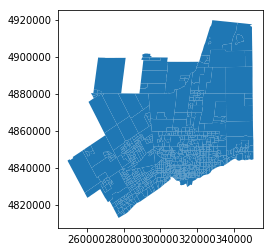

In [26]:
#make Shapefile_SA CRS match neighbourhood SA and CL List CRS
crs = {'init': 'epsg:4326'}
shapefile_SA = gpd.GeoDataFrame(shapefile_SA, crs=crs,geometry='geometry')
shapefile_SA = shapefile_SA.to_crs({'init':'epsg:2019'})
shapefile_SA['geometry']=shapefile_SA['geometry'].rotate(angle = -17, origin=(315000,4840000), use_radians=False)
print(shapefile_SA.plot())
shapefile_SA

{'init': 'epsg:4326'}
AxesSubplot(0.125,0.198065;0.775x0.60887)


,AREA_S_CD,AREA_NAME,geometry
0,097,Yonge-St.Clair (97),"POLYGON ((-79.39119482700001 43.681081124, -79..."
1,027,York University Heights (27),"POLYGON ((-79.505287916 43.759873494, -79.5048..."
2,038,Lansing-Westgate (38),"POLYGON ((-79.439984311 43.761557655, -79.4400..."
3,031,Yorkdale-Glen Park (31),"POLYGON ((-79.439687326 43.705609818, -79.4401..."
4,016,Stonegate-Queensway (16),"POLYGON ((-79.49262119700001 43.64743635, -79...."
5,118,Tam O'Shanter-Sullivan (118),"POLYGON ((-79.319794152 43.768363303, -79.3198..."
6,063,The Beaches (63),"POLYGON ((-79.314850871 43.666739771, -79.3135..."
7,003,Thistletown-Beaumond Heights (3),"POLYGON ((-79.577514796 43.733835422, -79.5780..."
8,055,Thorncliffe Park (55),"POLYGON ((-79.335417828 43.70319967, -79.33573..."
9,059,Danforth East York (59),"POLYGON ((-79.346273565 43.682723883, -79.3464..."


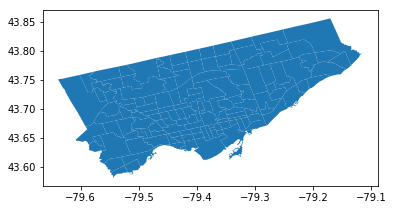

In [27]:
#import TO Neighbourhood shapefile from: https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/locations-and-mapping/#a45bd45a-ede8-730e-1abc-93105b2c439f
shapefile_TO = gpd.read_file("NEIGHBORHOODS_WGS84.shp") #map_df is this
print(shapefile_TO.crs)
print(shapefile_TO.plot())
shapefile_TO


In [28]:
#import cleaned dataframe from Craiglist Housing
df = pd.read_csv("craigslist_housing_cleaned.csv")
df.head()

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,outlier,ppbed,pparea
0,6812910773,2100.0,4.0,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC,False,164750.0,313.809524
1,6812921890,950.0,2.0,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,False,289500.0,609.473684
2,6812934716,500.0,1.0,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,False,465000.0,930.000000
3,6813641313,1625.0,3.0,2019-03-07,471000.0,43.351751,-80.327754,cambridge,CAMBRIDGE- PRE-CONSTRUCTION FREEHOLD TOWNHOME...,False,157000.0,289.846154
4,6813651847,525.0,1.0,2019-03-07,437000.0,43.589177,-79.646570,mississauga,MISSISSAUGA- PRE-CONSTRUCTION,False,437000.0,832.380952


In [29]:
#A GeoDataFrame needs a shapely object, so we create a new column Coordinates as a tuple of Longitude and Latitude :
df['coordinates']=list(zip(df.longitude, df.latitude))
#Then, we transform tuples to Point :
df['coordinates'] = df['coordinates'].apply(Point)
crs = {'init': 'epsg:4326'}
#Now, we can create the GeoDataFrame by setting geometry with the coordinates created previously.
gdf = gpd.GeoDataFrame(df, crs=crs,geometry='coordinates')
gdf.head()
#Source:http://geopandas.org/gallery/create_geopandas_from_pandas.html

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,outlier,ppbed,pparea,coordinates
0,6812910773,2100.0,4.0,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC,False,164750.0,313.809524,POINT (-79.836381 43.188546)
1,6812921890,950.0,2.0,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,False,289500.0,609.473684,POINT (-79.56723700000001 43.569182)
2,6812934716,500.0,1.0,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,False,465000.0,930.000000,POINT (-79.480574 43.626406)
3,6813641313,1625.0,3.0,2019-03-07,471000.0,43.351751,-80.327754,cambridge,CAMBRIDGE- PRE-CONSTRUCTION FREEHOLD TOWNHOME...,False,157000.0,289.846154,POINT (-80.327754 43.351751)
4,6813651847,525.0,1.0,2019-03-07,437000.0,43.589177,-79.646570,mississauga,MISSISSAUGA- PRE-CONSTRUCTION,False,437000.0,832.380952,POINT (-79.64657 43.589177)


In [30]:
####Create GDF for all bedrooms count####
#sjoin to link data to neighborhoods
pointInPoly = gpd.sjoin(gdf, shapefile_TO, op='within') 

#aggregate overall data by neighborhood
tmp_ppbed = pointInPoly.groupby('AREA_NAME')['ppbed'].median()
tmp_pparea = pointInPoly.groupby('AREA_NAME')['pparea'].median()
tmp_bedrooms= pointInPoly.groupby('AREA_NAME')['bedrooms'].mean()
tmp_price= pointInPoly.groupby('AREA_NAME')['price'].mean()

#join to shapefile
shapefile_TO_tmpa=shapefile_TO.merge(tmp_ppbed, on='AREA_NAME')
shapefile_TO_tmpa=shapefile_TO_tmpa.merge(tmp_pparea, on='AREA_NAME')
shapefile_TO_tmpa=shapefile_TO_tmpa.merge(tmp_bedrooms, on='AREA_NAME')
shapefile_TO_tmpa=shapefile_TO_tmpa.merge(tmp_price, on='AREA_NAME')
shapefile_TO_tmpa['listbdrmcount'] = 'all'

#Store in map_df2
shapefile_TO2 = shapefile_TO_tmpa

#Repeate for all bedroom counts
#for i in bedrooms:
#    #sjoin to link data to neighborhoods
#    pointInPoly = gpd.sjoin(gdf[gdf.bedrooms==i], map_df, op='within') 

    #aggregate overall data by neighborhood
#    tmp_ppbed = pointInPoly.groupby('AREA_NAME')['ppbed'].median()
#    tmp_pparea=pointInPoly.groupby('AREA_NAME')['ppAREA'].median()
#    tmp_bedrooms=pointInPoly.groupby('AREA_NAME')['bedrooms'].mean()

    #join to shapefile
#    shapefile_TO_tmp=shapefile_TO.merge(tmp_ppbed, on='AREA_NAME')
#    shapefile_TO_tmp=shapefile_TO_tmp.merge(tmp_pparea, on='AREA_NAME')
#    shapefile_TO_tmp=shapefile_TO_tmp.merge(tmp_bedrooms, on='AREA_NAME')
#    shapefile_TO_tmp['listbdrmcount'] = i
    
    #append to map_df2 
#    shapefile_TO2=shapefile_TO2.append(map_df_tmp)


#fill NA with 0's
shapefile_TO2['ppbed'].fillna(0, inplace=True)
shapefile_TO2['pparea'].fillna(0, inplace=True)
shapefile_TO2['bedrooms'].fillna(0, inplace=True)
shapefile_TO2.crs = shapefile_TO.crs

shapefile_TO2 = gpd.GeoDataFrame(shapefile_TO2, crs=crs,geometry='geometry')
shapefile_TO2 = shapefile_TO2.to_crs({'init':'epsg:2019'})
#Convert CRS to MTM Zone 10 (https://epsg.io/7991)
# map_df = map_df.to_crs(epsg=7991)
gdf['coordinates']=gdf['coordinates'].to_crs(epsg=2019)

In [31]:
gdf

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,outlier,ppbed,pparea,coordinates
0,6812910773,2100.0,4.0,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETAC,False,164750.000000,313.809524,POINT (277457.1343105577 4783027.599525349)
1,6812921890,950.0,2.0,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,False,289500.000000,609.473684,POINT (299368.6955446645 4825258.867063434)
2,6812934716,500.0,1.0,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,False,465000.000000,930.000000,POINT (306367.7169280934 4831613.987574046)
3,6813641313,1625.0,3.0,2019-03-07,471000.0,43.351751,-80.327754,cambridge,CAMBRIDGE- PRE-CONSTRUCTION FREEHOLD TOWNHOME...,False,157000.000000,289.846154,POINT (237695.0984418317 4801435.16535861)
4,6813651847,525.0,1.0,2019-03-07,437000.0,43.589177,-79.646570,mississauga,MISSISSAUGA- PRE-CONSTRUCTION,False,437000.000000,832.380952,POINT (292964.210895457 4827488.387455424)
5,6816555663,1838.0,3.0,2019-03-10,275000.0,43.655500,-79.362600,toronto,PGA Village Resort - Sunny Fla - Guard Gated G...,False,91666.666667,149.619151,POINT (315883.1052256972 4834855.115918516)
6,6817953944,2100.0,4.0,2019-03-07,659000.0,43.188546,-79.836381,hamilton,STONEY CREEEK- PRE CONSTRUCTION DETACHED HOMES...,False,164750.000000,313.809524,POINT (277457.1343105577 4783027.599525349)
7,6817962523,950.0,2.0,2019-03-07,579000.0,43.569182,-79.567237,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TO,False,289500.000000,609.473684,POINT (299368.6955446645 4825258.867063434)
8,6817971069,500.0,1.0,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FROM400s,False,465000.000000,930.000000,POINT (306367.7169280934 4831613.987574046)
9,6818055407,525.0,1.0,2019-03-07,437000.0,43.589177,-79.646570,mississauga,MISSISSAUGA- PRE-CONSTRUCTION CONDOS FOR SALE...,False,437000.000000,832.380952,POINT (292964.210895457 4827488.387455424)


AxesSubplot(0.164949,0.125;0.695102x0.755)


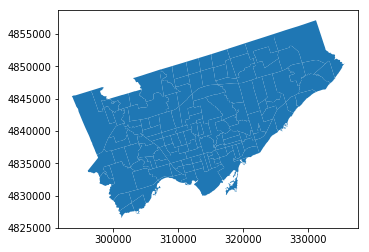

In [32]:
shapefile_TO2.head()
print(shapefile_TO2.plot())

In [41]:

shapefile_TO2.to_csv( "Shapefile_test.csv", index=False, encoding='utf-8-sig')

AxesSubplot(0.125,0.207002;0.775x0.590996)


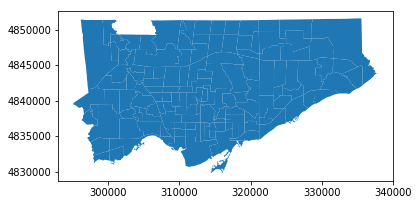

In [33]:
#Rotate map to be better visually represented
shapefile_TO2['geometry']=shapefile_TO2['geometry'].rotate(angle = -17, origin=(315000,4840000), use_radians=False)
gdf['coordinates']=gdf['coordinates'].rotate(angle = -17, origin=(315000,4840000), use_radians=False)
shapefile_TO.head()
print(shapefile_TO2.plot())

In [34]:
#define X Y Limits
gdf['longitude'] = gdf.coordinates.x
gdf['latitude'] = gdf.coordinates.y

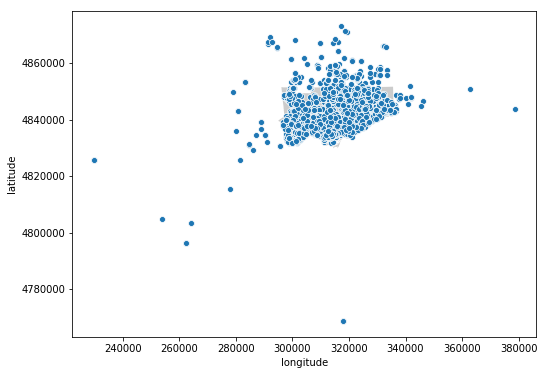

In [35]:
#DELETE THIS I THINK
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
shapefile_TO2[shapefile_TO2.listbdrmcount == 'all'].plot(ax=ax, color='gray',alpha = 0.4,)
sns.scatterplot("longitude", "latitude", data=gdf)
plt.show()

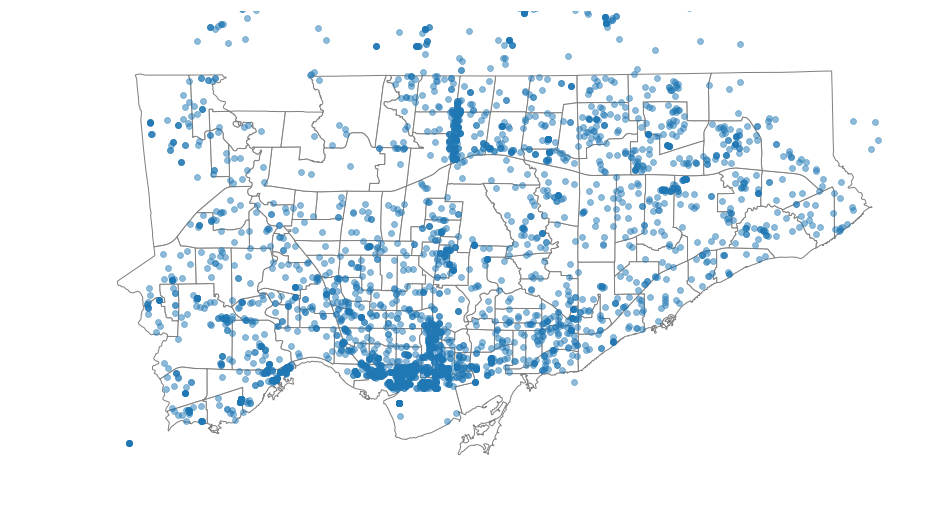

In [36]:
#plot all listings
xlim = (292500,340000)
ylim = (4828000,4855000)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
shapefile_TO2[shapefile_TO2.listbdrmcount == 'all'].plot(ax=ax, color='white',edgecolor = 'grey')
sns.scatterplot("longitude", "latitude", data=gdf,edgecolor = None ,alpha = 0.5)
plt.xlim(xlim)
plt.ylim(ylim)
ax.axis('off')
plt.show()

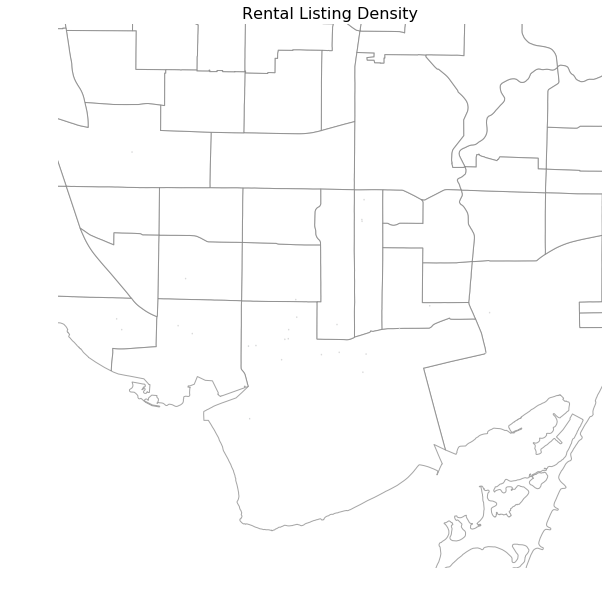

In [37]:
#Lets zoom into the downtown core
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
shapefile_TO2[shapefile_TO2.listbdrmcount == 'all'].plot(ax=ax, color='white',edgecolor = 'grey',alpha = 0.7,)
plt.hexbin(gdf.longitude, gdf.latitude, gridsize=(20000,5000),alpha = 0.8,mincnt=5,edgecolors='lightgrey',cmap='Blues')
plt.xlim(307500,317500)
plt.ylim(4830000,4840000)
plt.title('Rental Listing Density',fontsize=16)
ax.axis('off')
plt.show()

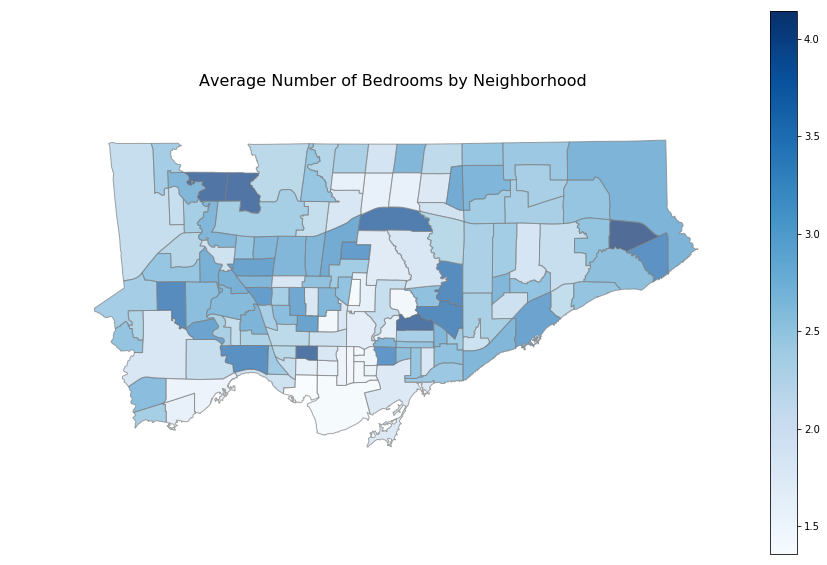

In [38]:
#Plot average number of bedrooms
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
shapefile_TO2[shapefile_TO2.listbdrmcount == 'all'].plot(ax=ax, column = 'bedrooms',edgecolor = 'grey',alpha = 0.7,cmap='Blues',legend=True)
plt.xlim(xlim)
plt.ylim(ylim)
plt.title('Average Number of Bedrooms by Neighborhood',fontsize=16)
ax.axis('off')
plt.show()

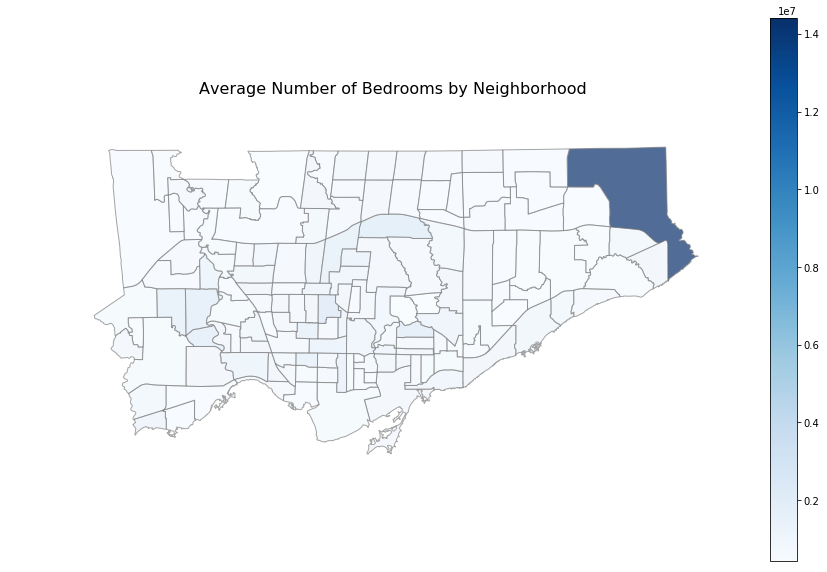

In [39]:
#Plot average number of bedrooms
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
shapefile_TO2[shapefile_TO2.listbdrmcount == 'all'].plot(ax=ax, column = 'price',edgecolor = 'grey',alpha = 0.7,cmap='Blues',legend=True)
plt.xlim(xlim)
plt.ylim(ylim)
plt.title('Average Number of Bedrooms by Neighborhood',fontsize=16)
ax.axis('off')
plt.show()

# Spatial Analytics Shapefile used below

NameError: name 'shapefile_SA2' is not defined

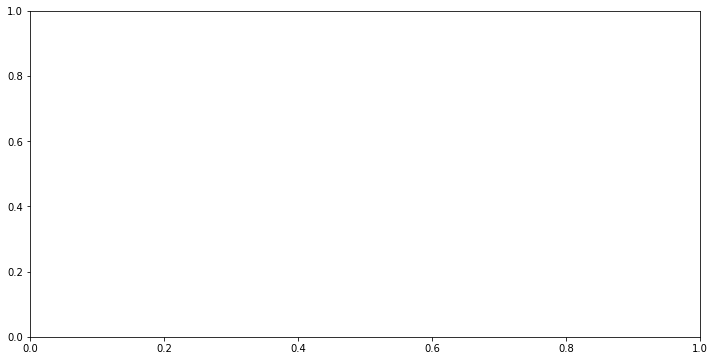

In [40]:


#plot all listings
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
shapefile_SA2[shapefile_SA2.listbdrmcount == 'all'].plot(ax=ax, color='gray',alpha = 0.4,)
sns.scatterplot("longitude", "latitude", data=gdf)
plt.show()

In [ ]:
#plot all listings
xlim = (292500,340000)
ylim = (4828000,4855000)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
shapefile_SA2[shapefile_SA2.listbdrmcount == 'all'].plot(ax=ax, color='white',edgecolor = 'grey')
sns.scatterplot("longitude", "latitude", data=gdf,edgecolor = None ,alpha = 0.5)
plt.xlim(xlim)
plt.ylim(ylim)
ax.axis('off')
plt.show()

In [ ]:
####Create GDF for all bedrooms count####
#sjoin to link data to neighborhoods
pointInPoly2 = gpd.sjoin(gdf, shapefile_SA, op='within') 

#aggregate overall data by neighborhood
tmp_ppbed = pointInPoly2.groupby('name')['ppbed'].median()
tmp_pparea = pointInPoly2.groupby('name')['pparea'].median()
tmp_bedrooms= pointInPoly2.groupby('name')['bedrooms'].mean()

#join to shapefile
shapefile_SA_tmpa=shapefile_SA.merge(tmp_ppbed, on='name')
shapefile_SA_tmpa=shapefile_SA_tmpa.merge(tmp_pparea, on='name')
shapefile_SA_tmpa=shapefile_SA_tmpa.merge(tmp_bedrooms, on='name')
shapefile_SA_tmpa['listbdrmcount'] = 'all'

#Store in map_df2
shapefile_SA2 = shapefile_SA_tmpa

#Repeate for all bedroom counts
#for i in bedrooms:
#    #sjoin to link data to neighborhoods
#    pointInPoly = gpd.sjoin(gdf[gdf.bedrooms==i], map_df, op='within') 

    #aggregate overall data by neighborhood
#    tmp_ppbed = pointInPoly.groupby('AREA_NAME')['ppbed'].median()
#    tmp_pparea=pointInPoly.groupby('AREA_NAME')['ppAREA'].median()
#    tmp_bedrooms=pointInPoly.groupby('AREA_NAME')['bedrooms'].mean()

    #join to shapefile
#    shapefile_TO_tmp=shapefile_TO.merge(tmp_ppbed, on='AREA_NAME')
#    shapefile_TO_tmp=shapefile_TO_tmp.merge(tmp_pparea, on='AREA_NAME')
#    shapefile_TO_tmp=shapefile_TO_tmp.merge(tmp_bedrooms, on='AREA_NAME')
#    shapefile_TO_tmp['listbdrmcount'] = i
    
    #append to map_df2 
#    shapefile_TO2=shapefile_TO2.append(map_df_tmp)


#fill NA with 0's
shapefile_SA2['ppbed'].fillna(0, inplace=True)
shapefile_SA2['pparea'].fillna(0, inplace=True)
shapefile_SA2['bedrooms'].fillna(0, inplace=True)
shapefile_SA2.crs = shapefile_SA.crs

#shapefile_SA2 = gpd.GeoDataFrame(shapefile_SA2, crs=crs,geometry='geometry')
#shapefile_SA2 = shapefile_SA2.to_crs({'init':'epsg:2019'})
#Convert CRS to MTM Zone 10 (https://epsg.io/7991)


In [124]:
pointInPoly2

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,outlier,ppbed,pparea,coordinates,index_right,spatial_id,name,Total Households,Total Population,Median Household Income
1,6812921890,950.0,2.0,2019-03-07,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
7,6817962523,950.0,2.0,2019-03-07,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TO,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
30,6827708537,950.0,2.0,2019-03-24,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWNH...,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
72,6833515814,950.0,2.0,2019-03-18,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
834,6842492816,950.0,2.0,2019-03-17,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOW...,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
1137,6846796194,950.0,2.0,2019-03-23,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWN...,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
2036,6855564354,950.0,2.0,2019-04-01,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE URBAN TOWNH...,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
3132,6866083171,950.0,2.0,2019-04-17,579000.0,4.830473e+06,295741.819041,mississauga,MISSISSAUGA LAKESHORE RD - UPSCALE U,False,289500.000000,609.473684,POINT (295741.8190412482 4830473.135595125),847,5350500.01,"CT0500.01, Toronto, ON",1724.0,3703.0,57255.73
2,6812934716,500.0,1.0,2019-03-07,465000.0,4.834504e+06,304293.073895,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,False,465000.000000,930.000000,POINT (304293.0738947142 4834504.251750877),267,5350210.02,"CT0210.02, Toronto, ON",7531.0,12217.0,86830.44
8,6817971069,500.0,1.0,2019-03-07,465000.0,4.834504e+06,304293.073895,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FROM400s,False,465000.000000,930.000000,POINT (304293.0738947142 4834504.251750877),267,5350210.02,"CT0210.02, Toronto, ON",7531.0,12217.0,86830.44


In [126]:
pointInPoly

,id,area,bedrooms,date,price,latitude,longitude,neighbourhood,text,outlier,ppbed,pparea,coordinates,index_right,AREA_S_CD,AREA_NAME
2,6812934716,500.0,1.0,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FR,False,465000.000000,930.000000,POINT (-79.480574 43.626406),129,017,Mimico (includes Humber Bay Shores) (17)
8,6817971069,500.0,1.0,2019-03-07,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CONDOS FROM400s,False,465000.000000,930.000000,POINT (-79.480574 43.626406),129,017,Mimico (includes Humber Bay Shores) (17)
31,6827721170,500.0,1.0,2019-03-24,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY CON,False,465000.000000,930.000000,POINT (-79.480574 43.626406),129,017,Mimico (includes Humber Bay Shores) (17)
38,6831155761,NaN,1.0,2019-03-13,390000.0,43.628204,-79.478681,etobicoke,Eau Du Soleil_1 Bedroom Condo for Sale,False,390000.000000,NaN,POINT (-79.47868100000002 43.628204),129,017,Mimico (includes Humber Bay Shores) (17)
42,6832606428,754.0,2.0,2019-03-28,675000.0,43.621071,-79.482967,etobicoke,Waterfront Condo Assignment Sale,False,337500.000000,895.225464,POINT (-79.482967 43.621071),129,017,Mimico (includes Humber Bay Shores) (17)
59,6833471154,NaN,1.0,2019-03-04,538900.0,43.627445,-79.477068,etobicoke,For Sale-Catch the Vibe in this beautiful lake...,False,538900.000000,NaN,POINT (-79.477068 43.627445),129,017,Mimico (includes Humber Bay Shores) (17)
62,6833485962,NaN,1.0,2019-03-04,548888.0,43.627445,-79.477068,etobicoke,Lovely 1 Bedroom Suite At Lakeshore/Parklawn,False,548888.000000,NaN,POINT (-79.477068 43.627445),129,017,Mimico (includes Humber Bay Shores) (17)
73,6833524415,500.0,1.0,2019-03-18,465000.0,43.626406,-79.480574,etobicoke,TORONTO- LAKEFRONT LUXURY a,False,465000.000000,930.000000,POINT (-79.480574 43.626406),129,017,Mimico (includes Humber Bay Shores) (17)
146,6834239789,NaN,2.0,2019-03-05,719000.0,43.629821,-79.475486,etobicoke,Immaculate Waterfront Waterscapes Luxury Condo...,False,359500.000000,NaN,POINT (-79.475486 43.629821),129,017,Mimico (includes Humber Bay Shores) (17)
215,6834956678,NaN,2.0,2019-03-06,650000.0,43.626093,-79.486289,etobicoke,21 Bedroom Suite With Endless Upgrades,False,325000.000000,NaN,POINT (-79.486289 43.626093),129,017,Mimico (includes Humber Bay Shores) (17)


In [130]:
shapefile_SA2

,spatial_id,name,Total Households,Total Population,Median Household Income,geometry,ppbed,pparea,bedrooms,listbdrmcount
0,5350001.00,"CT0001.00, Toronto, ON",249.0,600.0,79727.91,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",453975.000000,589.934236,2.333333,all
1,5350002.00,"CT0002.00, Toronto, ON",267.0,613.0,74505.79,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",549490.000000,941.164706,1.580645,all
2,5350005.00,"CT0005.00, Toronto, ON",3722.0,6969.0,33807.26,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",474150.000000,462.727273,3.000000,all
3,5350007.01,"CT0007.01, Toronto, ON",1892.0,3498.0,37613.16,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",399975.000000,0.000000,4.666667,all
4,5350007.02,"CT0007.02, Toronto, ON",2696.0,5112.0,29080.60,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",481950.000000,831.484848,1.285714,all
5,5350008.01,"CT0008.01, Toronto, ON",5434.0,8228.0,90550.60,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",509900.000000,830.615385,1.310345,all
6,5350008.02,"CT0008.02, Toronto, ON",6680.0,10952.0,77824.29,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",549900.000000,825.030784,1.233333,all
7,5350010.01,"CT0010.01, Toronto, ON",3438.0,5927.0,91780.07,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",529000.000000,793.470588,1.516129,all
8,5350010.02,"CT0010.02, Toronto, ON",4846.0,8428.0,73670.10,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",599900.000000,908.909091,1.312500,all
9,5350011.00,"CT0011.00, Toronto, ON",15388.0,22748.0,83229.86,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ...",537000.000000,959.766277,1.367925,all
